In [4]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import folium
from folium.plugins import FastMarkerCluster
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics


from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv('listings.csv')
df.head()

id                                               name  host_id  \
0  10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...  37177.0   
1  10990  Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...  37177.0   
2  10993  Rental unit in Athens · ★4.84 · Studio · 2 bed...  37177.0   
3  10995  Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...  37177.0   
4  27262  Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...  37177.0   

   host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527   
1  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   23.76448   
2  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98888   23.76473   
3  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   23.76448   
4  Emmanouil                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98924   23.76500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt  144.0             1.0               42.0  2023-09-10   
1  Entire home/apt   70.0             1.0               66.0  2023-07-01   
2  Entire home/apt   85.0             1.0               92.0  2023-07-07   
3  Entire home/apt   60.0             1.0               30.0  2023-06-02   
4  Entire home/apt   85.0             1.0               21.0  2023-06-02   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.28                             7.0             359.0   
1               0.49                             7.0              74.0   
2               0.69                             7.0              52.0   
3               0.19                             7.0              73.0   
4               0.16                             7.0              90.0   

   number_of_reviews_ltm      license  
0                    8.0  00000957568  
1                    3.0  00001070920  
2                    5.0  00000957080  
3                    1.0  00000957422  
4                    2.0  00000957579

# Data Preprocessing

In [7]:
#Drop columns
df.drop(columns = ['id' , 'neighbourhood_group' ,'license'], inplace=True)


In [8]:
#Drop NaN
df.dropna(inplace=True)

In [9]:
#checking the data types of the columns
df.shape

(10971, 15)

In [10]:
#checking for the missing values
df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [11]:
#Checking data types of the columns
df.dtypes


name                               object
host_id                           float64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
dtype: object

In [8]:
#Checking for duplicate values
df.duplicated().sum()

0

In [9]:
# checking the data description
df.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  1.097100e+04  10971.000000  10971.000000  10971.000000    10971.000000   
mean   1.955103e+08     37.979868     23.731569    100.008112        2.957889   
std    1.630026e+08      0.013441      0.012516    219.784593       15.600921   
min    1.805000e+03     37.950590     23.700720     10.000000        1.000000   
25%    4.906590e+07     37.968713     23.723802     49.000000        1.000000   
50%    1.583086e+08     37.978250     23.729610     70.000000        2.000000   
75%    3.004986e+08     37.988000     23.737555    108.000000        2.000000   
max    5.364112e+08     38.030830     23.780220   8000.000000      800.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       10971.000000       10971.000000                    10971.000000   
mean           57.127153           1.795328                       12.388023   
std            87.328070           1.780489                       19.913530   
min             1.000000           0.010000                        1.000000   
25%             6.000000           0.460000                        1.000000   
50%            20.000000           1.180000                        3.000000   
75%            70.000000           2.620000                       14.000000   
max           865.000000          15.500000                      114.000000   

       availability_365  number_of_reviews_ltm  
count      10971.000000           10971.000000  
mean         228.057151              16.179109  
std          124.891290              20.550086  
min            0.000000               0.000000  
25%          121.000000               2.000000  
50%          276.000000               8.000000  
75%          336.000000              23.000000  
max          365.000000             206.000000

In [10]:
df['neighbourhood'].unique()

array(['ΑΜΠΕΛΟΚΗΠΟΙ', 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ',
       'ΣΤΑΔΙΟ', 'ΝΕΑ ΚΥΨΕΛΗ', 'ΚΟΛΩΝΑΚΙ', 'ΠΑΓΚΡΑΤΙ',
       'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ', 'ΑΚΡΟΠΟΛΗ', 'ΑΝΩ ΠΑΤΗΣΙΑ',
       'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΠΕΤΡΑΛΩΝΑ', 'ΚΕΡΑΜΕΙΚΟΣ',
       'ΝΙΡΒΑΝΑ', 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΘΗΣΕΙΟ',
       'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΠΕΔΙΟ ΑΡΕΩΣ', 'ΙΛΙΣΙΑ', 'ΚΥΨΕΛΗ',
       'ΑΝΩ ΚΥΨΕΛΗ', 'ΓΟΥΒΑ', '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΠΡΟΜΠΟΝΑ', 'ΓΟΥΔΙ',
       'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΓΚΑΖΙ', 'ΛΥΚΑΒΗΤΤΟΣ', 'ΝΕΟΣ ΚΟΣΜΟΣ',
       'ΚΟΛΩΝΟΣ', 'ΖΑΠΠΕΙΟ', 'ΒΟΤΑΝΙΚΟΣ', 'ΓΚΥΖΗ', 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ',
       'ΠΕΝΤΑΓΩΝΟ', 'ΠΑΤΗΣΙΑ', 'ΠΟΛΥΓΩΝΟ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ',
       'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΚΟΛΟΚΥΝΘΟΥ', 'ΣΕΠΟΛΙΑ', 'ΡΙΖΟΥΠΟΛΗ', 'ΡΗΓΙΛΛΗΣ'],
      dtype=object)

In [11]:
# Categorizing the neighbourhood make
def neighbourhood_make(neighbourhood):
    if neighbourhood in ['ΑΝΩ ΚΥΨΕΛΗ',  'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ', 'ΚΥΨΕΛΗ', 'ΠΕΔΙΟ ΑΡΕΩΣ' , 'ΝΕΑ ΚΥΨΕΛΗ']:
        return 'new_fashion'
    elif neighbourhood in ['ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ','ΠΑΤΗΣΙΑ', 'ΝΙΡΒΑΝΑ', 'ΠΡΟΜΠΟΝΑ', 'ΑΝΩ ΠΑΤΗΣΙΑ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ' , 'ΡΙΖΟΥΠΟΛΗ' ,'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ','ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ', 'ΚΟΛΩΝΟΣ', 'ΚΟΛΟΚΥΝΘΟΥ','ΣΕΠΟΛΙΑ']:
        return 'down town'
    elif neighbourhood in ['ΓΟΥΔΙ', 'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΙΛΙΣΙΑ', 'ΑΜΠΕΛΟΚΗΠΟΙ' ,'ΠΟΛΥΓΩΝΟ' ,'ΓΚΥΖΗ' ,'ΠΕΝΤΑΓΩΝΟ' ]:
        return 'metro4'
    elif neighbourhood in ['ΚΕΡΑΜΕΙΚΟΣ','ΘΗΣΕΙΟ', 'ΠΕΤΡΑΛΩΝΑ'  , 'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ' , 'ΓΚΑΖΙ' , 'ΒΟΤΑΝΙΚΟΣ', 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ']:
        return 'turistik'
    elif neighbourhood in ['ΡΗΓΙΛΛΗΣ', 'ΖΑΠΠΕΙΟ', 'ΑΚΡΟΠΟΛΗ', 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ',  'ΛΥΚΑΒΗΤΤΟΣ', 'ΚΟΛΩΝΑΚΙ']:
        return 'lux_area'
    elif neighbourhood in ['ΠΑΓΚΡΑΤΙ','ΓΟΥΒΑ', '1Ο ΝΕΚΡΟΤΑΦΕΙΟ',  'ΣΤΑΔΙΟ' , 'ΝΕΟΣ ΚΟΣΜΟΣ']:
        return 'modern'
    else:
        return 'Other'
    
df['neighbourhood_make'] = df['neighbourhood'].apply(neighbourhood_make)

In [12]:
df['neighbourhood_make'].value_counts()

lux_area       3021
turistik       2197
down town      1953
modern         1623
new_fashion    1243
metro4          934
Name: neighbourhood_make, dtype: int64

In [13]:
df['latitude'].value_counts()

37.967049    16
37.984475    15
37.980880    15
37.986145    15
37.966370    14
             ..
37.989258     1
37.997550     1
37.987682     1
37.997470     1
37.994630     1
Name: latitude, Length: 6729, dtype: int64

# Exploratory Data Analysis

Visualizing the data

Text(0.5, 1.0, 'latitude and Price')

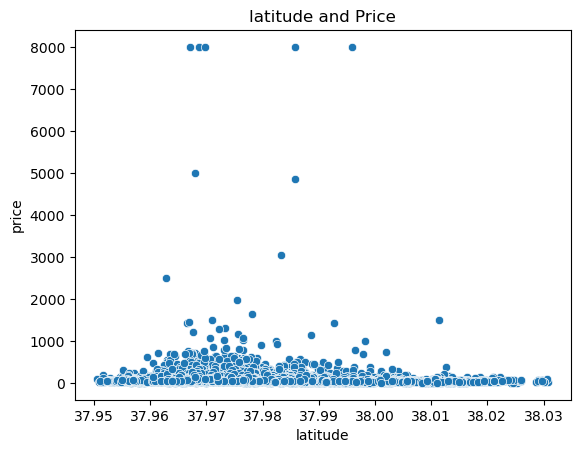

In [14]:
sns.scatterplot(x = 'latitude', y = 'price', data = df).set_title('latitude and Price')

Text(0.5, 1.0, 'latitude')

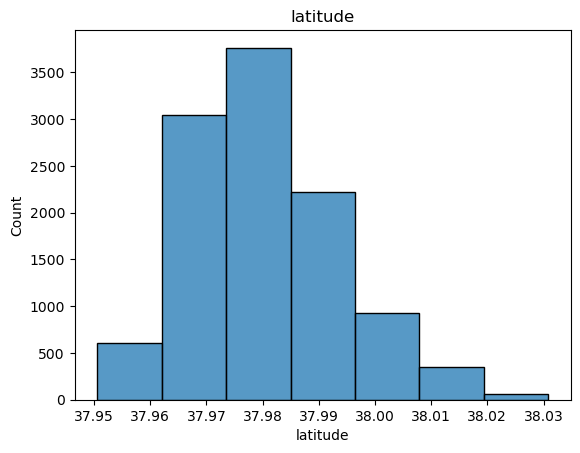

In [15]:
sns.histplot(x = 'latitude', data = df, bins = 7).set_title('latitude')

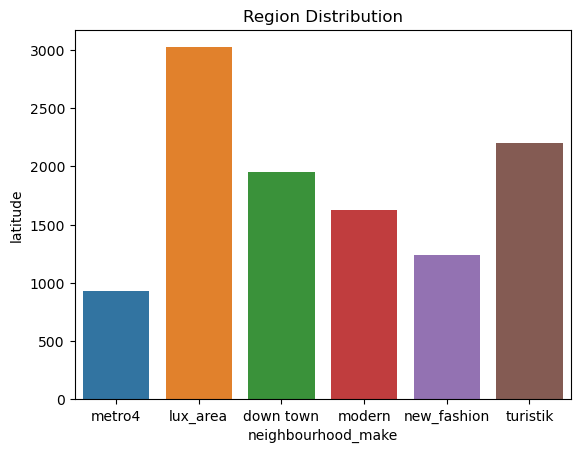

In [16]:
#regionwise plot
sns.countplot(x = 'neighbourhood_make', data = df)
plt.title('Region Distribution')
plt.xlabel('neighbourhood_make')
plt.ylabel('latitude')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'lux_area'),
  Text(1, 0, 'turistik'),
  Text(2, 0, 'down town'),
  Text(3, 0, 'modern'),
  Text(4, 0, 'new_fashion'),
  Text(5, 0, 'metro4')])

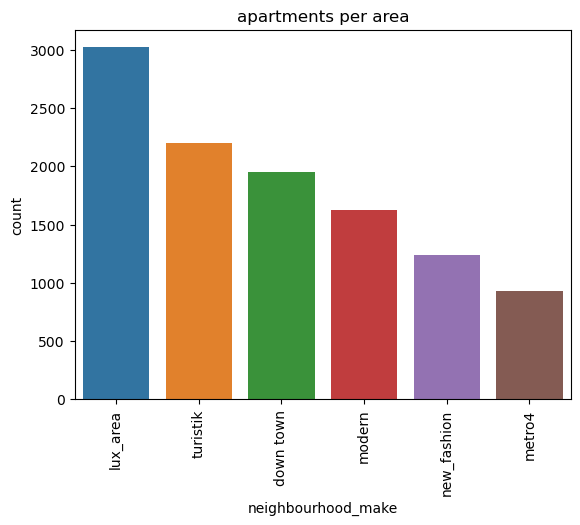

In [17]:
sns.countplot(x = 'neighbourhood_make', data = df, order = df['neighbourhood_make'].value_counts().iloc[:10].index).set_title('apartments per area')
plt.xticks(rotation = 90)

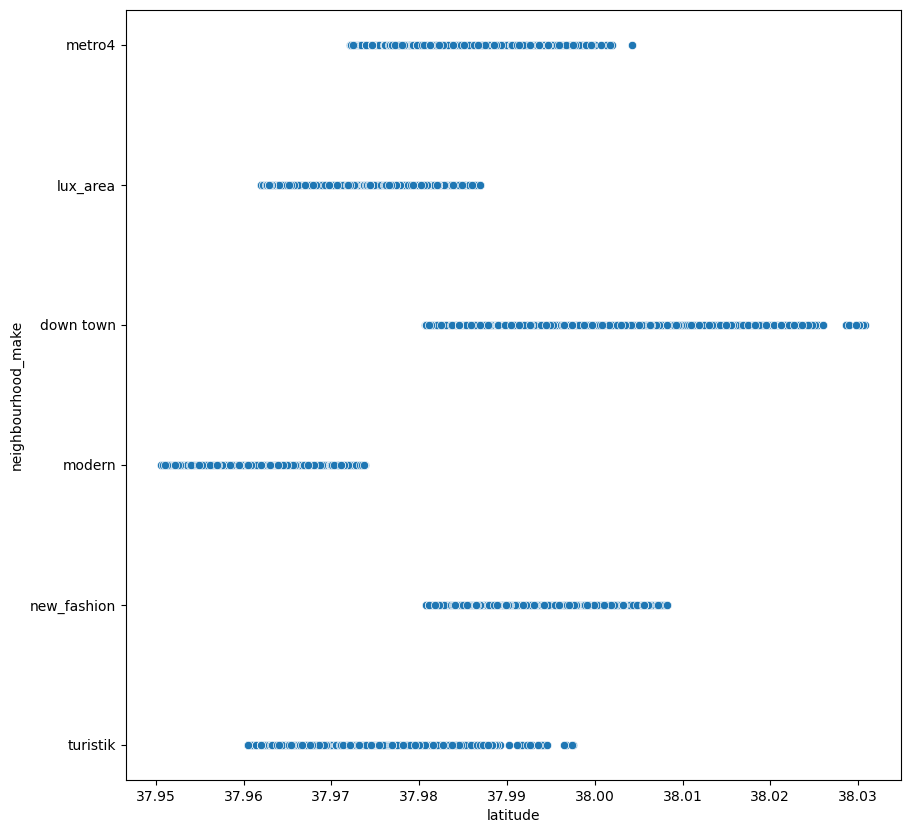

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot( x = df['latitude'], y = df['neighbourhood_make'])
plt.show()

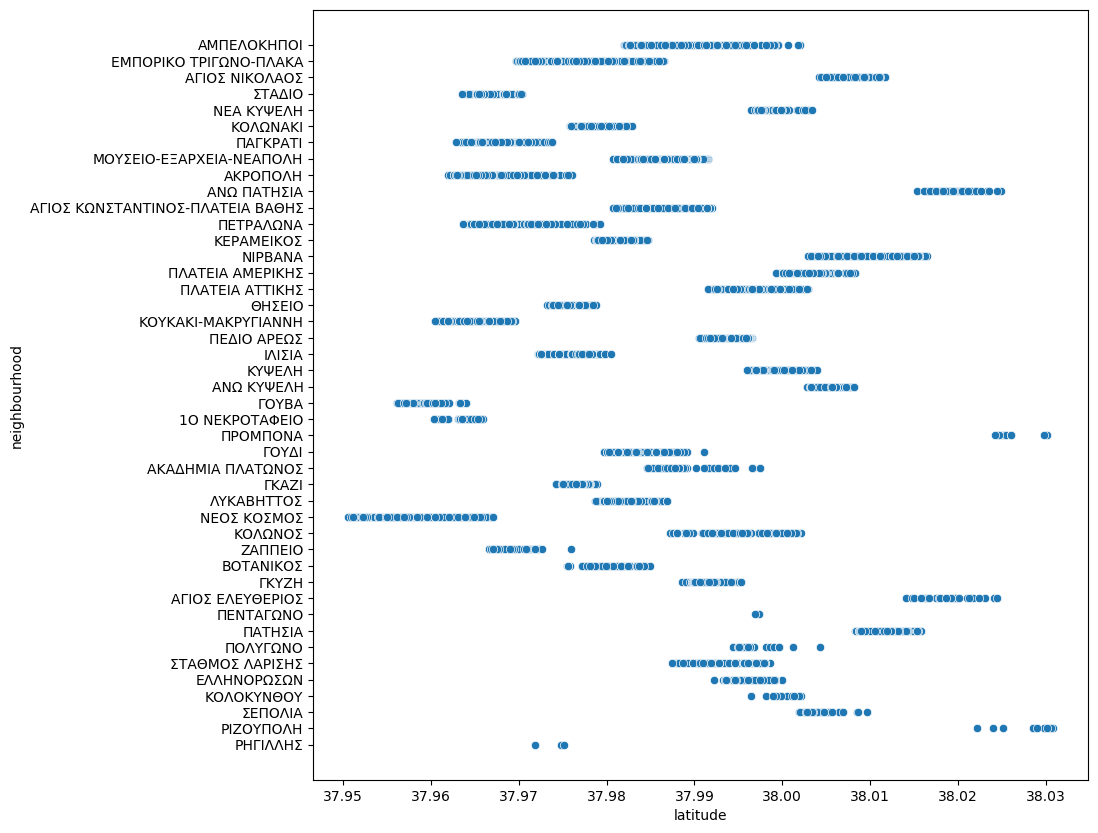

In [19]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot( x = df['latitude'], y = df['neighbourhood'])
plt.show()

Text(0.5, 1.0, 'longitude')

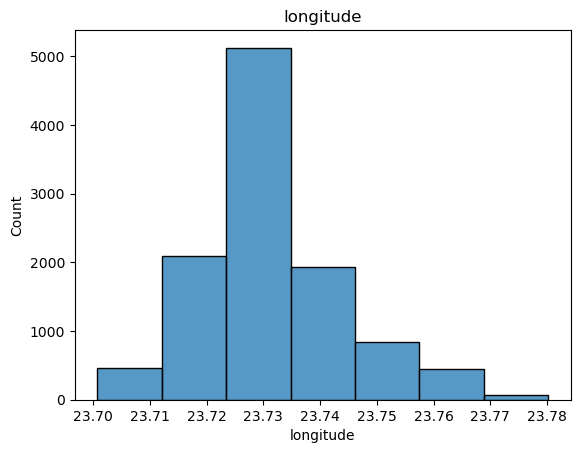

In [20]:
sns.histplot(x = 'longitude', data = df, bins = 7).set_title('longitude')

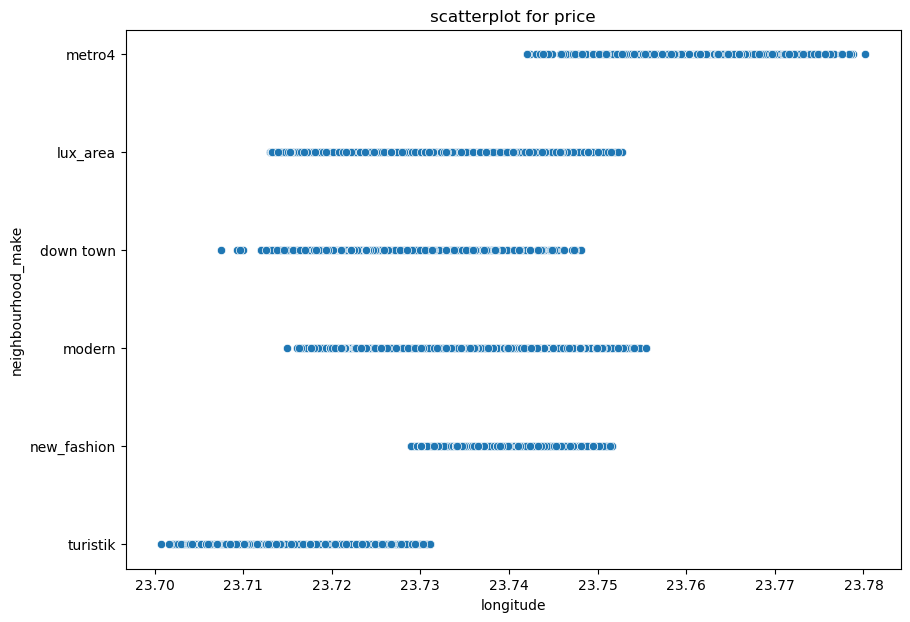

In [21]:
plt.figure(figsize=(10,7))
plt.title("scatterplot for price")
sns.scatterplot(x="longitude", y="neighbourhood_make", data =  df[(df.price > 10.0)])
plt.xlabel('longitude')
plt.ylabel('neighbourhood_make')
plt.show()

Text(0.5, 1.0, 'longitude')

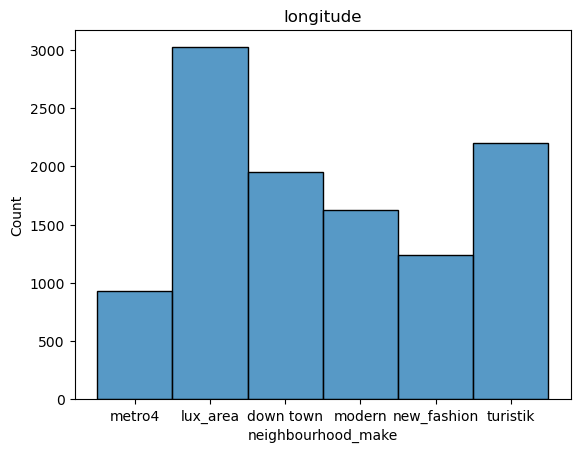

In [22]:
sns.histplot(x = 'neighbourhood_make', data = df, bins = 2).set_title('longitude')

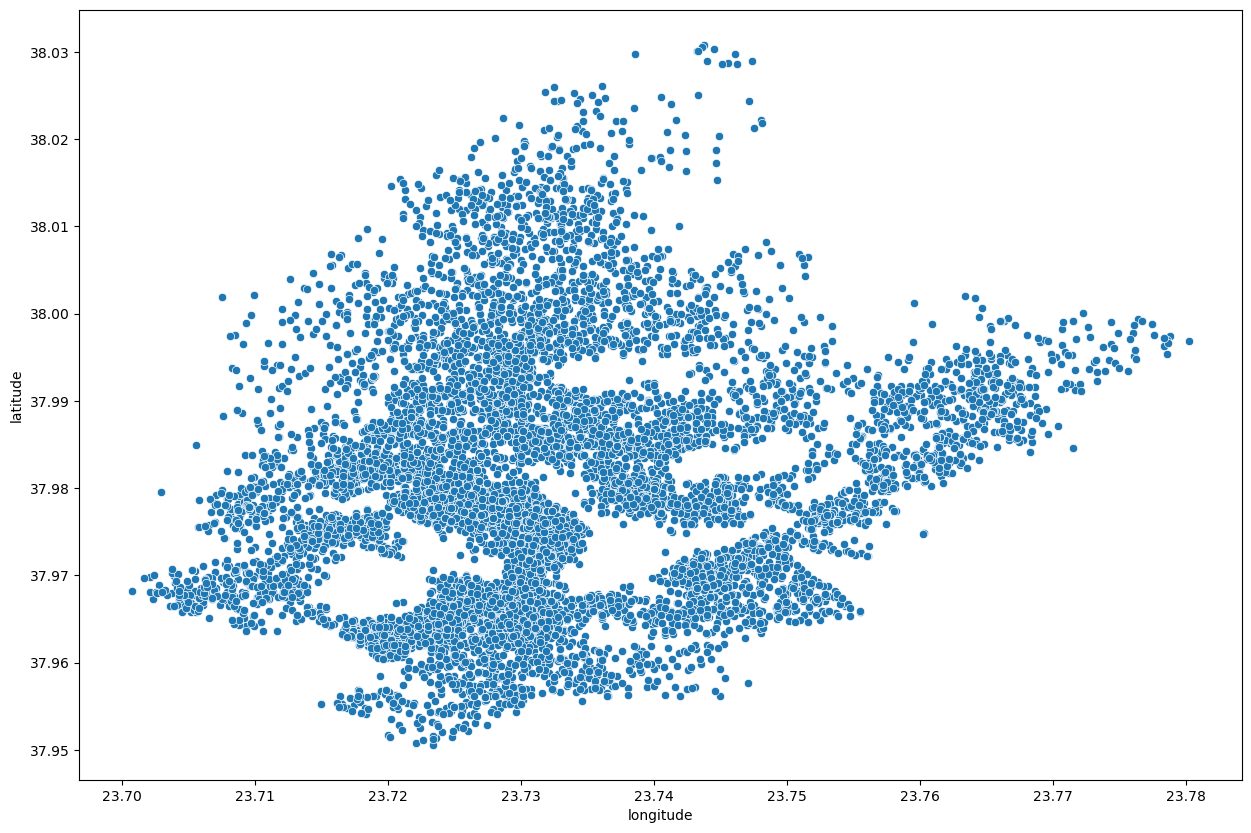

In [23]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.scatterplot( x = df['longitude'], y = df['latitude'])
plt.show()

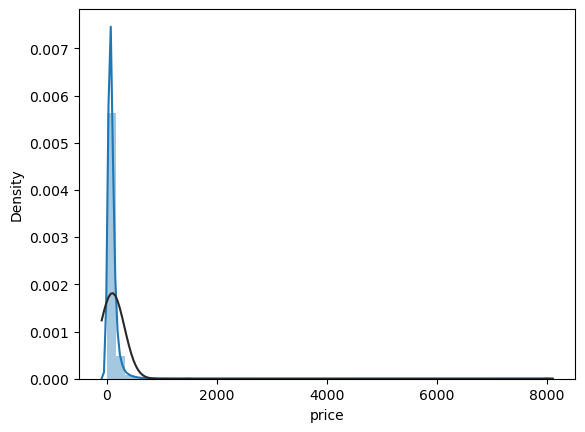

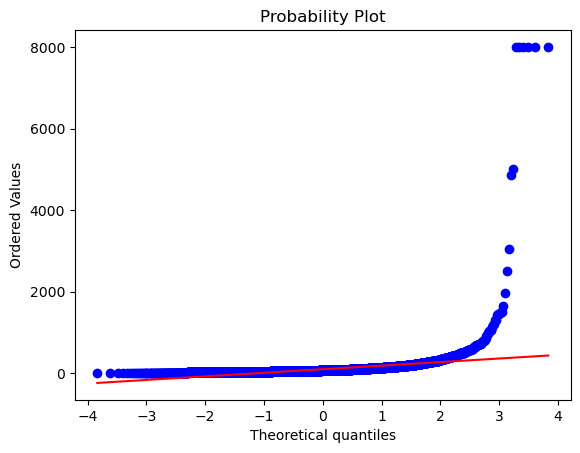

In [24]:
#histogram and normal probability plot
sns.distplot(df['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

In [25]:
#applying log transformation
df['price'] = np.log(df['price'])

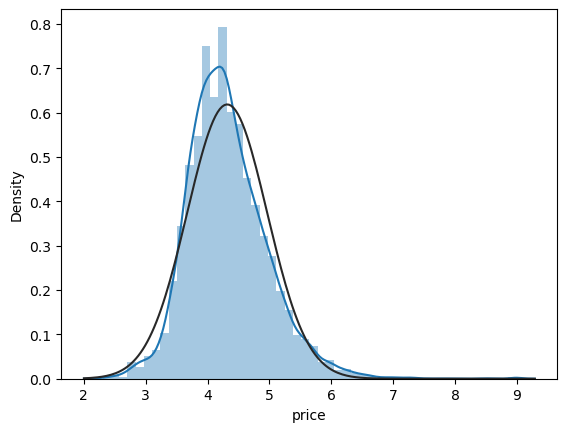

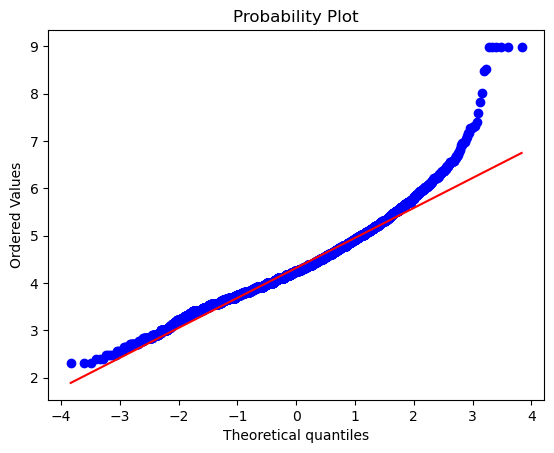

In [26]:
#transformed histogram and normal probability plot
sns.distplot(df['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

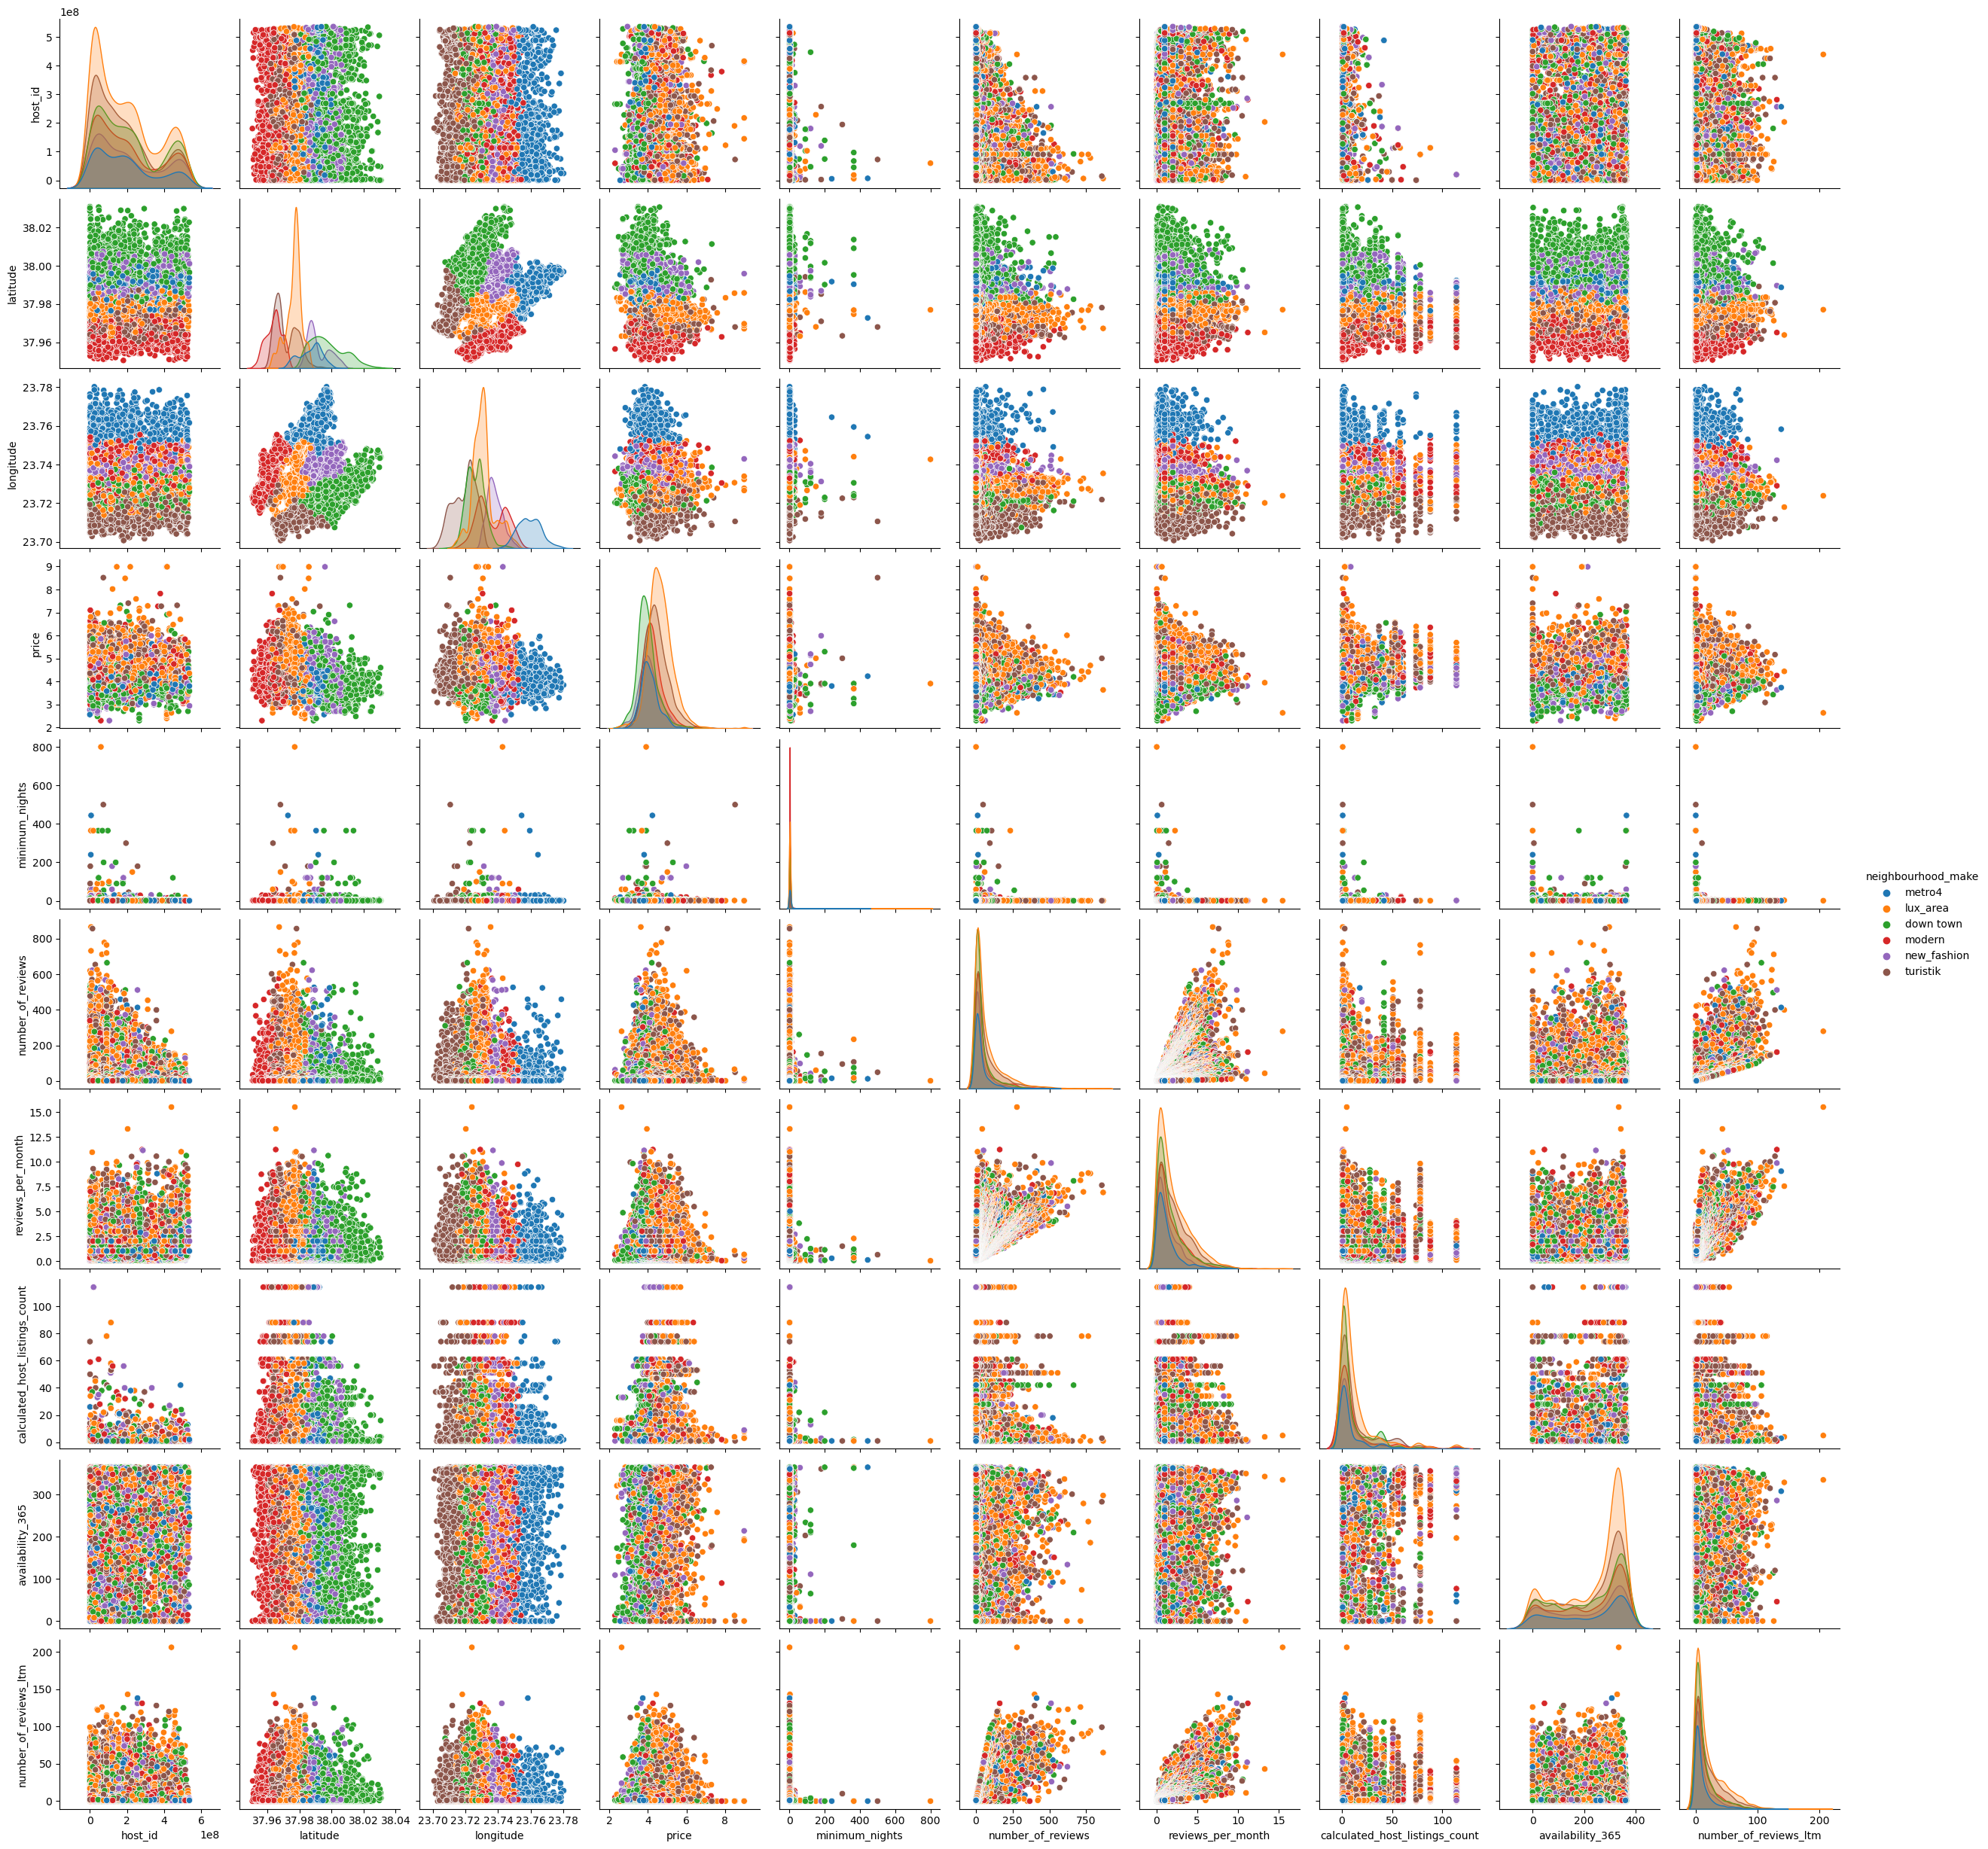

In [27]:
sns.pairplot(df,kind='scatter', hue='neighbourhood_make')
plt.show()

In [28]:
#mapping the apartments
map = folium.Map(location=[37.9, -23.7],zoom_start=3)
marker_cluster = FastMarkerCluster(df[['latitude', 'longitude']].values.tolist()).add_to(map)
map

In [5]:
from sklearn.cluster import KMeans

In [86]:
X = df.iloc[:, [4,5]].values


In [87]:
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    km.fit(X)
    
    wcss.append(km.inertia_)

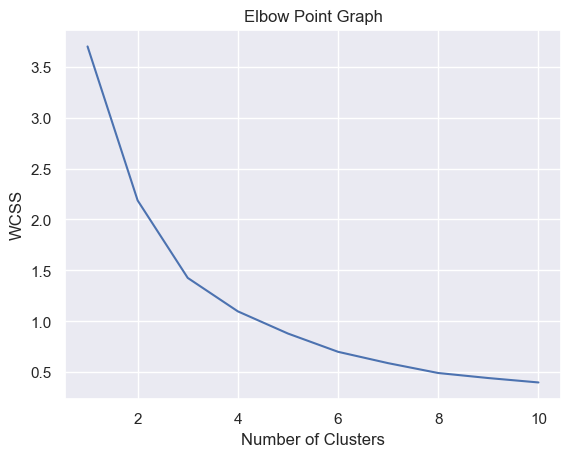

In [88]:
# plot elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [94]:
# initiate model
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 0)

# assign label for each cluster
Y = kmeans.fit_predict(X)

print(Y)

[0 0 0 ... 0 0 0]


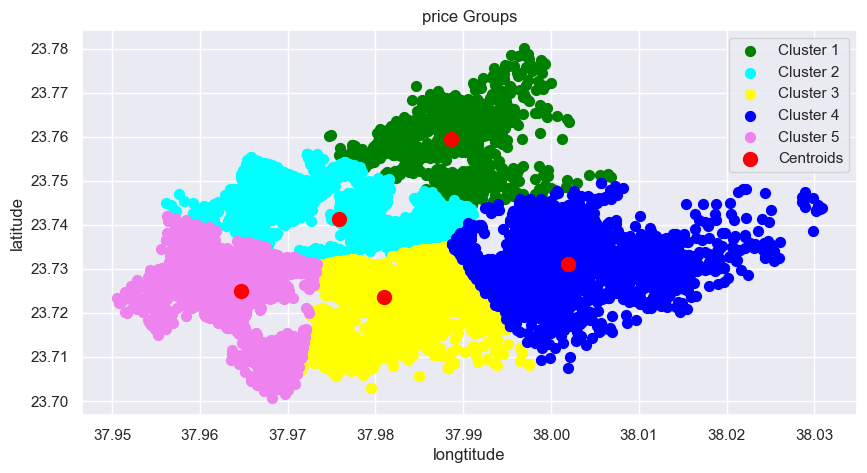

In [95]:
# plot clusters
plt.figure(figsize = (10,5))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 50, c = "green", label = "Cluster 1" )
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 50, c = "cyan", label = "Cluster 2" )
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 50, c = "yellow", label = "Cluster 3" )
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 50, c = "blue", label = "Cluster 4" )
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s = 50, c = "violet", label = "Cluster 5" )

# plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "red", label = "Centroids")

plt.title("price Groups")
plt.xlabel("longtitude")
plt.ylabel("latitude")
plt.legend()
plt.show()